### Image Pipeline

<ol>
<li> Take a picture of your face or have a friend do it.</li>
<li> Import the image into Jupyter Notebook. </li>
<li> Analyze the image </li>
<li> Create a histogram the whole image. RGB </li>
<li> Modify your image with brightness and contrast. </li>
<li> Mask out your face. </li>
<li> Use the mask to create a HSV histogram. </li>
<li> Analyze the histogram for skin tone ranges. </li>
<li> Use the HSV ranges to create a mask. </li>
<li> Apply the mask to the image and segment out your skin/face </li>
<ol>


In [13]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Import image
img = cv2.imread('testImage.png', 1)

(1087, 1480, 3)


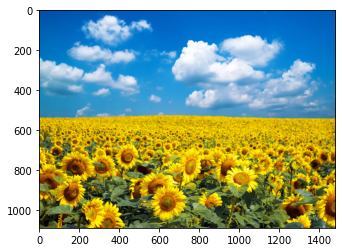

In [15]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

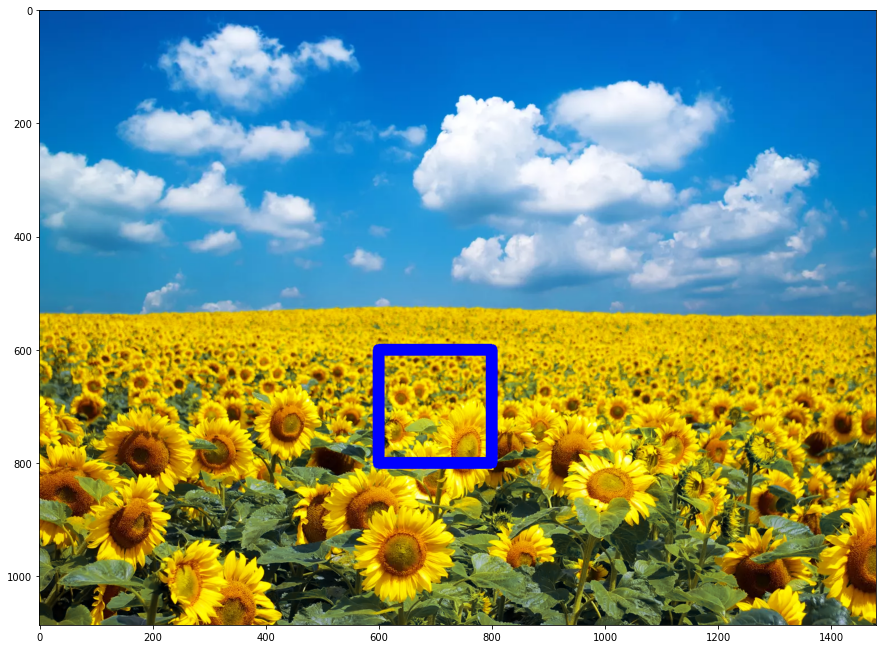

In [16]:
# Convert back to BGR
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Top left of rectangle.
top_left = (600, 600)

# Bottom right of rectangle.
bottom_right = (800, 800)

# Color
rect_color = (255,0,0)

# Thickness of line
thickness = 20

# Apply rectangle.
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
img_rect = cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB)

# Make image larger on plot.
fig = plt.figure(figsize=(15,15))

# Plot image.
plt.imshow(img_rect)


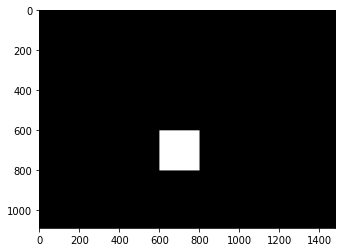

In [17]:
# Top left of rectangle.
# top_left = (1250, 1000)

# Bottom right of rectangle.
# bottom_right = (1800, 1600)

# Bottom right of rectangle.
bottom_right = (800, 800)

# Color
rect_color = (255,0,0)


# Create an black mask.
mask = np.zeros(img.shape[:2], np.uint8)

# Add the white portion of the mask.
mask[600:800, 600:800] = 255

# Plot mask.
plt.imshow(mask, cmap="gray")

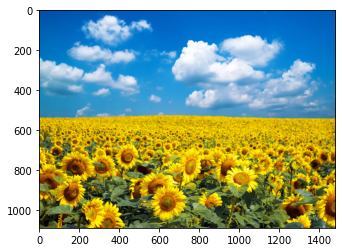

In [18]:
# Reimport image
img = cv2.imread("testImage.png", 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [19]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

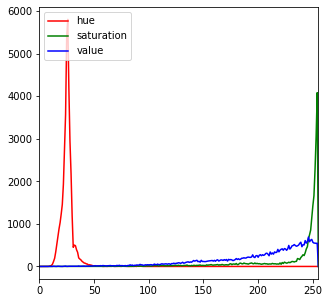

In [20]:
# Size of the histogram
fig = plt.figure(figsize=(5,5))

# Plot the hue.
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])

# Plot the saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])

# Plot the value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])

plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()

True

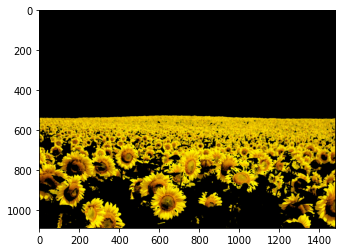

In [26]:
# Minimum and maximum HSV values.
min_HSV = np.array([10,225,90], np.uint8)
max_HSV = np.array([50,255,255], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_RGB2BGR)

# save image
cv2.imwrite("skinHSV.png", skinHSV)